In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
from collections import deque
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm

In [2]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 141 rows and 141 cols


In [3]:
for ir, r in enumerate(input_text):
    for ic, el in enumerate(r):
        if el == 'S':
            start_r, start_c = ir, ic 
        elif el == 'E':
            end_r, end_c = ir, ic 

print(start_r, start_c, end_r, end_c)

49 61 69 69


In [4]:
dirs = [(1, 0), (0, 1), (-1, 0), (0, -1)]
mat = np.zeros((n_rows, n_cols)) + np.inf # steps from end
mat[end_r, end_c] = 0
n = n_rows 

def in_bounds(x, y):
    if x >= 0 and x < n and y >= 0 and y < n:
        return True
    return False

queue = deque([((end_r, end_c, set([end_r, end_c])))])

## BFS to find maze solution
while len(queue) > 0:
    x, y, visited = queue.popleft()
    for d in dirs:
        xn, yn = x + d[0], y + d[1]
        if (xn, yn) not in visited and in_bounds(xn, yn) and input_text[xn][yn] != '#':
            mat[xn, yn] = min(mat[xn, yn], mat[x, y] + 1)  ## add min distance to end
            visited.add((xn, yn))
            queue.append((xn, yn, visited))


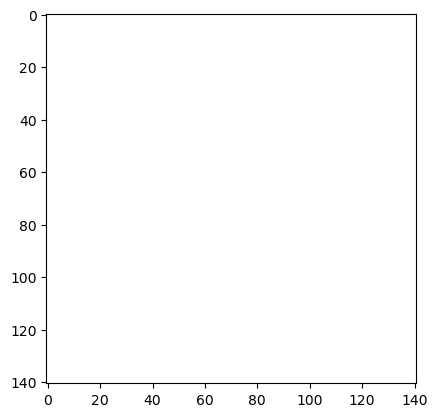

In [5]:
import matplotlib.pyplot as plt
plt.imshow(mat)

In [6]:
list_bars = []
total = 0
threshold = 100

## try all cheat combos:
for ir in range(n_rows):
    for ic in range(n_cols):

        if mat[ir, ic] == np.inf:  # start on path
            continue 

        for d in dirs:
            if (not in_bounds(ir + 2 * d[0], ic + 2 * d[1])) or (mat[ir + d[0], ic + d[1]] != np.inf):  # only consider wall jumps
                continue 

            s = (ir, ic)
            e = (ir + 2 * d[0], ic + 2 * d[1])
            end = mat[e]
            if end != np.inf and abs(end - mat[s]) >= threshold + 2:  # end on path and above threshold:
                list_bars.append((s, e))
                total += 1

print(total // 2)  ## double counted so / 2
# print(list_bars)

1524


## part 2
- Use something like manhattan distance and loop through all 

In [7]:
## Create manhattan grid:
arr = np.arange(50)
grid = np.meshgrid(arr, arr)
center = np.array([25, 25]).reshape(-1, 1, 1)
distance = 20

inds_base = np.where(np.abs(grid - center).sum(0) <= distance)
inds_base = (inds_base[0] - 25, inds_base[1] - 25)

In [8]:

def get_inds_within_manh_range(x, y, max_dist=20, n=n_rows, inds_base=inds_base):
    '''Recentre manhattan grid and remove all points not in bounds'''
    inds = (inds_base[0] + x, inds_base[1] + y)
    
    tmp1 = np.logical_and(inds[0] >= 0, inds[0] < n)
    tmp2 = np.logical_and(inds[1] >= 0, inds[1] < n)
    tmp3 = np.logical_and(tmp1, tmp2)

    inds = (inds[0][tmp3], inds[1][tmp3])
    dist = np.array([abs(x - inds[0][ii]) + abs(y - inds[1][ii]) for ii in range(len(inds[0]))])

    results = []
    for ii, d in enumerate(dist):  # return as (row, col, dist)
        results.append((inds[0][ii], inds[1][ii], d))
    return results


In [9]:

total = 0 
threshold = 100

## try all combos
for ir in range(n_rows):
    for ic in range(n_cols):

        if mat[ir, ic] == np.inf:  # start on path
            continue 

        all_inds = get_inds_within_manh_range(ir, ic)  # get possible jumps

        for (xn, yn, dist) in all_inds:
            if mat[xn, yn] == np.inf:  # end on path
                continue 

            if abs(mat[xn, yn] - mat[ir, ic]) >= threshold + dist:  # if threshold, go
                total += 1
                
print(total // 2)  # correct for double count


1033746
